In [1]:
!pip install opencv-python

In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

img=cv2.imread('./Datasets/Lionel_Messi/26622.jpg')
img.shape

(500, 400, 3)

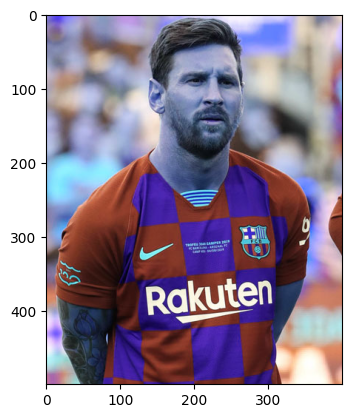

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(500, 400)

In [5]:
face_cascade=cv2.CascadeClassifier('haar_cascades\haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('haar_cascades\haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[165,  43, 122, 122]])

In [6]:
(x,y,w,h)=faces[0]
x,y,w,h

(165, 43, 122, 122)

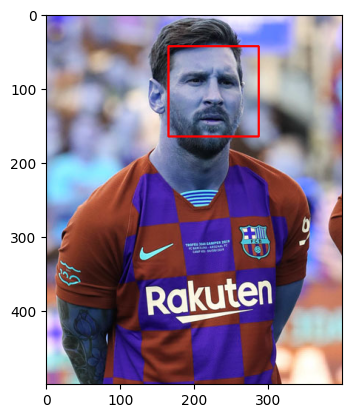

In [7]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

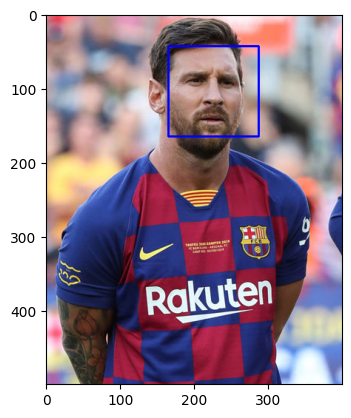

In [54]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.5, minNeighbors=3)
    for (ex,ey,ew,eh) in eyes:
        eye_img=cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB if necessary
face_img = face_img.astype(float) / 255.0  

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

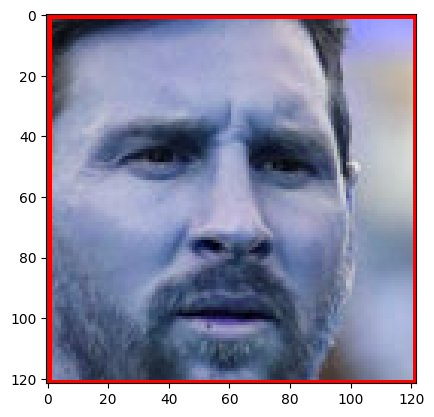

In [55]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [56]:
cropped_img = np.array(roi_color)
cropped_img.shape

(122, 122, 3)

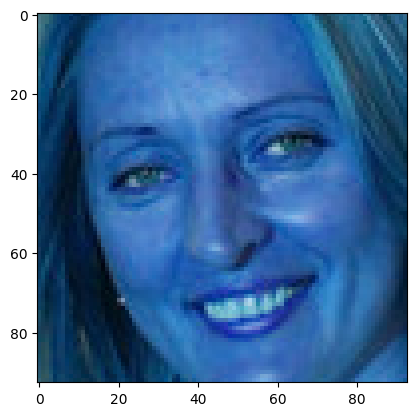

In [34]:
def get_cropped_img_for_2eyes(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]  # Fixed variable name from face_img to img
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None  # Return None if less than two eyes are detected

cropped_img = get_cropped_img_for_2eyes('./Datasets/Maria_Sharapova/001aa018f83f14d5a9cd30.jpg')
if cropped_img is not None:
    plt.imshow(cropped_img)
    plt.show()
else:
    print("Unable to detect two eyes in the image.")


In [41]:
path_to_data='./Datasets/'
path_to_cr_data='./Datasets/Cropped/'

import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if(entry.is_dir):
        img_dirs.append(entry.path)
        
img_dirs

['./Datasets/Cropped',
 './Datasets/Lionel_Messi',
 './Datasets/Maria_Sharapova',
 './Datasets/Roger_Federer',
 './Datasets/Serena_Williams',
 './Datasets/Virat_Kohli']

In [38]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [49]:
cropped_img_dirs = []
celeb_file_names_dict = {}
count = 0

for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celeb_file_names_dict[celebrity_name] = []  # Initialize list for each celebrity
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_img_for_2eyes(entry.path)
        
        if roi_color is not None and roi_color.size > 0:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
            
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print(f'Generating cropped images in folder {cropped_folder}')
                
            cropped_file_name = f'{celebrity_name}_{count}.png'
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
            
            cv2.imwrite(cropped_file_path, roi_color)
            
            celeb_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Cropped
Lionel_Messi
Generating cropped images in folder ./Datasets/Cropped/Lionel_Messi
Maria_Sharapova
Generating cropped images in folder ./Datasets/Cropped/Maria_Sharapova
Roger_Federer
Generating cropped images in folder ./Datasets/Cropped/Roger_Federer
Serena_Williams
Generating cropped images in folder ./Datasets/Cropped/Serena_Williams
Virat_Kohli
Generating cropped images in folder ./Datasets/Cropped/Virat_Kohli


In [57]:
import numpy as np
import pywt

def w2d(img,mode='haar',level=1):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)/255.
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H

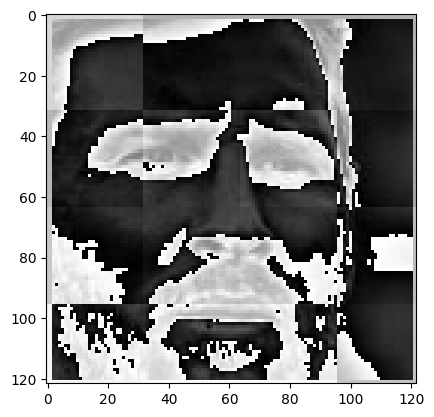

In [58]:
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [59]:
count=0
celeb_index={}
for celeb in celeb_file_names_dict.keys():
    celeb_index[celeb]=count
    count=count+1
celeb_index

{'Cropped': 0,
 'Lionel_Messi': 1,
 'Maria_Sharapova': 2,
 'Roger_Federer': 3,
 'Serena_Williams': 4,
 'Virat_Kohli': 5}

In [68]:
celeb_file_names_dict

{'Cropped': [],
 'Lionel_Messi': ['./Datasets/Cropped/Lionel_Messi\\Lionel_Messi_0.png',
  './Datasets/Cropped/Lionel_Messi\\Lionel_Messi_1.png',
  './Datasets/Cropped/Lionel_Messi\\Lionel_Messi_2.png',
  './Datasets/Cropped/Lionel_Messi\\Lionel_Messi_3.png',
  './Datasets/Cropped/Lionel_Messi\\Lionel_Messi_4.png',
  './Datasets/Cropped/Lionel_Messi\\Lionel_Messi_5.png',
  './Datasets/Cropped/Lionel_Messi\\Lionel_Messi_6.png',
  './Datasets/Cropped/Lionel_Messi\\Lionel_Messi_7.png',
  './Datasets/Cropped/Lionel_Messi\\Lionel_Messi_8.png',
  './Datasets/Cropped/Lionel_Messi\\Lionel_Messi_9.png',
  './Datasets/Cropped/Lionel_Messi\\Lionel_Messi_10.png',
  './Datasets/Cropped/Lionel_Messi\\Lionel_Messi_11.png',
  './Datasets/Cropped/Lionel_Messi\\Lionel_Messi_12.png',
  './Datasets/Cropped/Lionel_Messi\\Lionel_Messi_13.png',
  './Datasets/Cropped/Lionel_Messi\\Lionel_Messi_14.png',
  './Datasets/Cropped/Lionel_Messi\\Lionel_Messi_15.png',
  './Datasets/Cropped/Lionel_Messi\\Lionel_Messi_1

In [66]:
X,y=[],[]
for celebrity_name, training_files in celeb_file_names_dict.items():
    for training_image in training_files:
        if os.path.isfile(training_image):  # Check if the file exists
            img = cv2.imread(training_image)
            if img is not None:
                img = cv2.resize(img, (32, 32))
                img_har = w2d(img, 'db1', 5)
                img_har = cv2.resize(img_har, (32, 32))
                combined_img = np.vstack((img.reshape(32 * 32 * 3, 1), img_har.reshape(32 * 32, 1)))
                X.append(combined_img)
                y.append(celeb_index[celebrity_name])
            else:
                print(f"Failed to load image: {training_image}")
        else:
            print(f"Image not found: {training_image}")

Image not found: ./Datasets/Cropped/Lionel_Messi\Lionel_Messi_4.png
Image not found: ./Datasets/Cropped/Lionel_Messi\Lionel_Messi_10.png
Image not found: ./Datasets/Cropped/Lionel_Messi\Lionel_Messi_17.png
Image not found: ./Datasets/Cropped/Maria_Sharapova\Maria_Sharapova_37.png
Image not found: ./Datasets/Cropped/Maria_Sharapova\Maria_Sharapova_43.png
Image not found: ./Datasets/Cropped/Maria_Sharapova\Maria_Sharapova_46.png
Image not found: ./Datasets/Cropped/Maria_Sharapova\Maria_Sharapova_65.png
Image not found: ./Datasets/Cropped/Roger_Federer\Roger_Federer_89.png
Image not found: ./Datasets/Cropped/Serena_Williams\Serena_Williams_94.png
Image not found: ./Datasets/Cropped/Serena_Williams\Serena_Williams_104.png
Image not found: ./Datasets/Cropped/Serena_Williams\Serena_Williams_114.png
Image not found: ./Datasets/Cropped/Serena_Williams\Serena_Williams_118.png
Image not found: ./Datasets/Cropped/Serena_Williams\Serena_Williams_120.png
Image not found: ./Datasets/Cropped/Virat_Ko

In [69]:
len(X[0])

4096

In [70]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [219],
       [164],
       [163]], dtype=uint8)

In [73]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

In [75]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(151, 4096)

In [83]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('svc',SVC(kernel='rbf',C=10,gamma='scale'))
])
pipe.fit(X_train,y_train)
pipe.score(X_test, y_test)

0.8421052631578947

In [84]:
confusion_matrix(y_test,pipe.predict(X_test))

array([[10,  0,  1,  1,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  1,  6,  1,  1],
       [ 0,  0,  0,  3,  0],
       [ 0,  1,  0,  0,  8]], dtype=int64)

In [85]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.71      1.00      0.83         5
           3       0.86      0.67      0.75         9
           4       0.60      1.00      0.75         3
           5       0.89      0.89      0.89         9

    accuracy                           0.84        38
   macro avg       0.81      0.88      0.83        38
weighted avg       0.87      0.84      0.84        38



In [87]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [88]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [89]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.779447,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.673913,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.832806,{'logisticregression__C': 5}


In [90]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [91]:
for key in best_estimators.keys():
    print(f"The score of {key} is {best_estimators[key].score(X_test,y_test)}")

The score of svm is 0.8421052631578947
The score of random_forest is 0.6052631578947368
The score of logistic_regression is 0.868421052631579


In [93]:
best_clf=best_estimators['logistic_regression']
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[11,  0,  0,  1,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  1,  6,  1,  1],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  1,  8]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

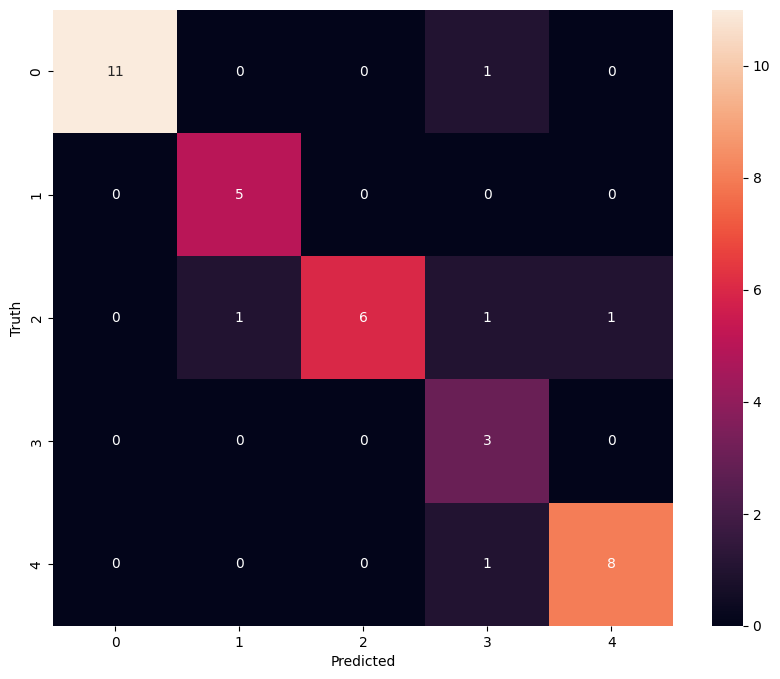

In [97]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [100]:
!pip install joblib
import joblib
joblib.dump(best_clf,'saved_model.pkl')

In [101]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(celeb_index))